In [146]:
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [147]:
csv_filename = ""
if csv_filename:
    df = pd.read_csv()
else:
    list_of_files = glob.glob('stats/*')
    latest_csv = max(list_of_files, key=os.path.getctime)
    df = pd.read_csv(latest_csv)
df

,name,optim,size,time
0,naive,0,32,0.000010
1,naive,0,32,0.000010
2,naive,0,32,0.000010
3,naive,0,32,0.000009
4,naive,0,32,0.000008
...,...,...,...,...
395,naive_half,3,16384,1.173248
396,naive_half,3,16384,1.054795
397,naive_half,3,16384,1.105983
398,naive_half,3,16384,1.100100


In [148]:
def create_scatter_subplot(ax, data, optims, name):
    for optim in optims:
        optim_data = data[data[:,1] == optim]
        x = optim_data[:,2] # Get matrix sizes
        y = optim_data[:,3] # Get execution time
        ax.scatter(x, y, label=f"-O{optim}")
        ax.legend(loc="upper left")
        ax.set_ylabel("Seconds")
        ax.set_xlabel("Matrix size")
        ax.title.set_text(name)

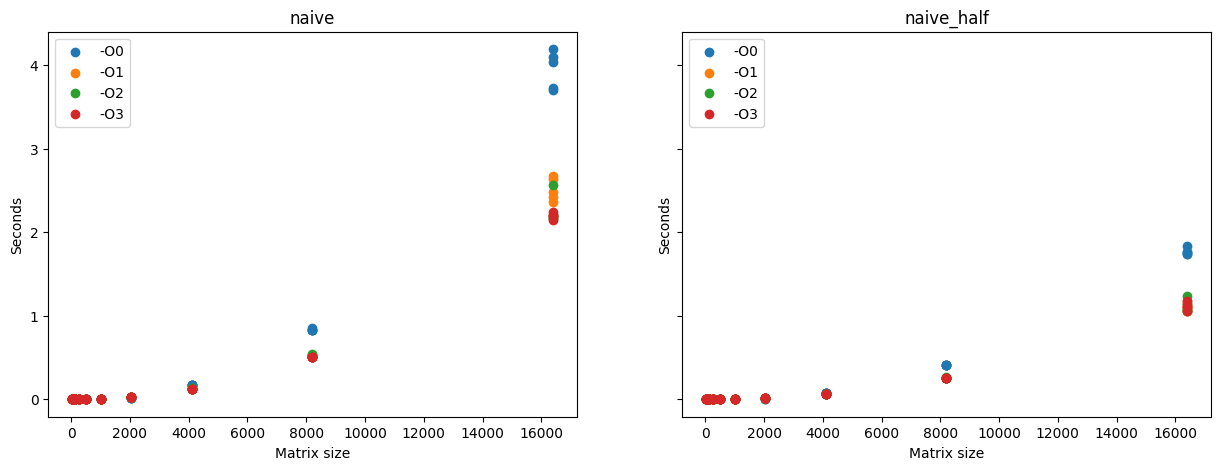

In [149]:
optims = df["optim"].unique()
names = df["name"].unique()

fig, ax = plt.subplots(1, len(names), figsize=(15, 5), sharey=True)

for i, name in enumerate(names):
    data = df[df["name"] == name].to_numpy()
    create_scatter_subplot(ax[i], data, optims, name)
plt.show()